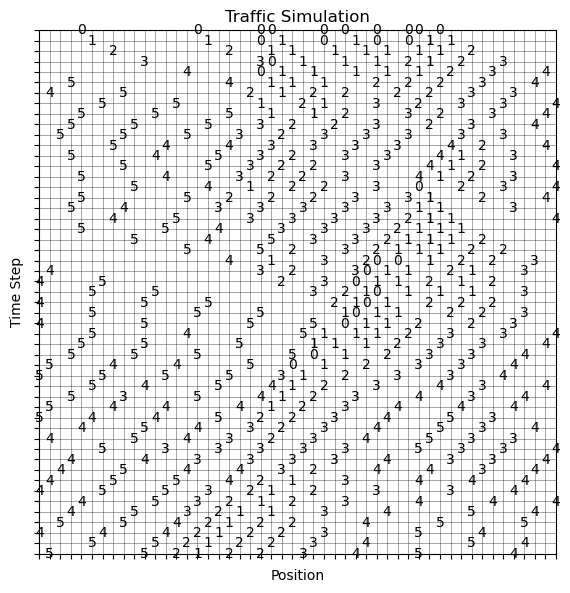

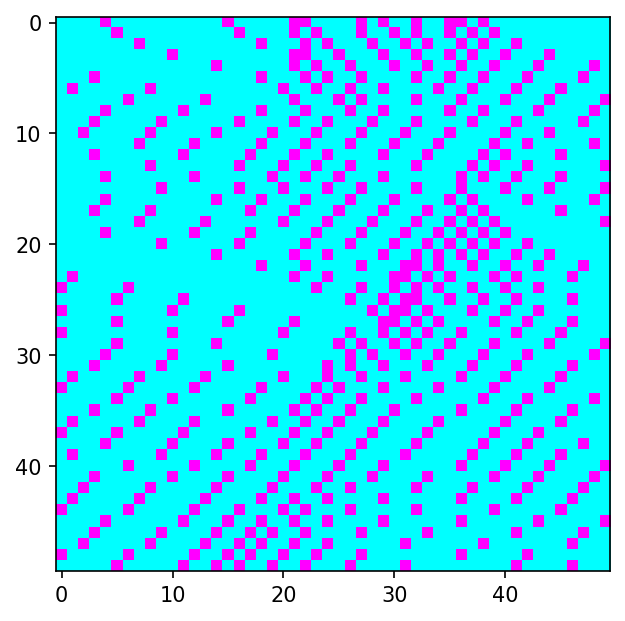

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import functions

tmax = 50
L = 50
N = 10
vmax = 5
p = 0.2

simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax)
functions.plot_simulation(simulation)


points = np.zeros((tmax, L))
for i in range(L):
    for j in range(tmax):
        if simulation[j][i] > -1:
            points[j][i] = 1
        else:
            points[j][i] = 0

plt.figure(dpi=150)
plt.imshow(points, cmap = "cool", interpolation = "nearest")
plt.show()